In [49]:
import numpy as np
import sys
import os 
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)

from scripts.helpers import *
from scripts.psnr_metrics import *
from scripts.metric_computation import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Load the image
data_path, output_path = get_paths()

channel = 0
image_index = '001'

image_path = f'channel{channel}/Image{image_index}/wf_channel{channel}.npy'
image = load_image(data_path, image_path)

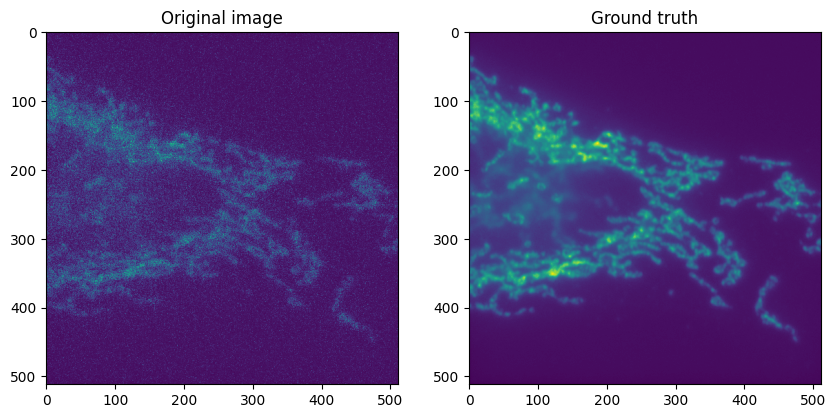

In [31]:
slice = sample_image(image)
ground_truth_image = ground_truth(image)

# Plot the slice and the ground truth one next to the other for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(slice)
ax[0].set_title('Original image')
ax[1].imshow(ground_truth_image)
ax[1].set_title('Ground truth')
plt.show()

In [32]:
denoised_image_folder = data_path.replace('raw', 'processed')
denoised_image_folder

'/Users/maximilien/Documents/DocumentsMac/EPFL/ML/nouveau projet /ML4Science-CS433/data/processed/'

In [33]:
denoised_image_gaussian = np.load(os.path.join(denoised_image_folder, 'Gaussian/Gaussian_denoised_channel0_image001_param5.npy'))
denoised_TV_ISO_01_image = np.load(os.path.join(denoised_image_folder, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.1.npy'))
denoised_TV_ISO_005_image = np.load(os.path.join(denoised_image_folder, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.05.npy'))
denoised_TV_ISO_008_image = np.load(os.path.join(denoised_image_folder, 'TV-ISO/TV-ISO_denoised_channel0_image001_param0.08.npy'))

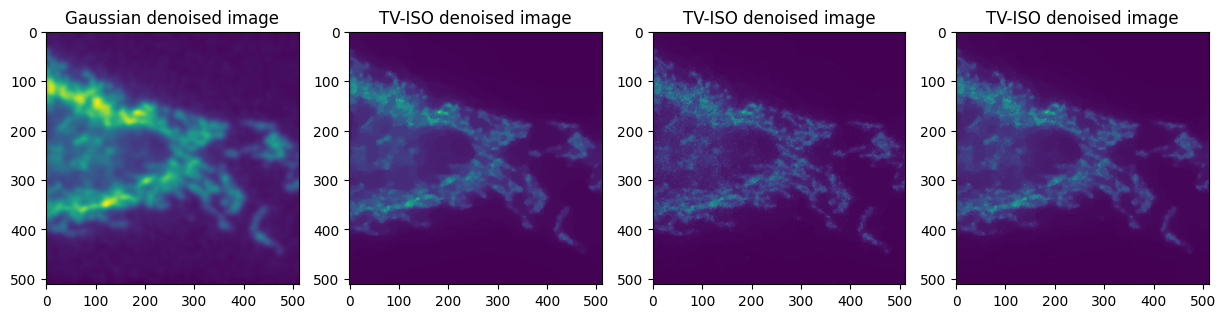

In [34]:
# plot the denoised images
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(denoised_image_gaussian)
ax[0].set_title('Gaussian denoised image')
ax[1].imshow(denoised_TV_ISO_01_image)
ax[1].set_title('TV-ISO denoised image')
ax[2].imshow(denoised_TV_ISO_005_image)
ax[2].set_title('TV-ISO denoised image')
ax[3].imshow(denoised_TV_ISO_008_image)
ax[3].set_title('TV-ISO denoised image')
plt.show()


In [ ]:
# output_path = '/Users/gattimartina/Documents/EPFL/Master/MA1/ML/projects/CS-433/data/output/'
# denoiser_folder = output_path.replace('output', 'test')
# os.makedirs(denoiser_folder, exist_ok=True)



In [35]:
denoised_image_median_param5 = np.load(os.path.join(denoised_image_folder, 'Median/Median_denoised_channel0_image001_param5.npy'))
denoised_image_median_param8 = np.load(os.path.join(denoised_image_folder, 'Median/Median_denoised_channel0_image001_param8.npy'))
denoised_image_median_param10 = np.load(os.path.join(denoised_image_folder, 'Median/Median_denoised_channel0_image001_param10.npy'))
denoised_image_NL_Means = np.load(os.path.join(denoised_image_folder, 'NL-Means/NL-Means_denoised_channel0_image001.npy'))
denoised_image_TV_Chambolle_param01 = np.load(os.path.join(denoised_image_folder, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.1.npy'))
denoised_image_TV_Chambolle_param02 = np.load(os.path.join(denoised_image_folder, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.2.npy'))
denoised_image_TV_Chambolle_param03 = np.load(os.path.join(denoised_image_folder, 'TV-Chambolle/TV-Chambolle_denoised_channel0_image001_param0.3.npy'))
denoised_image_TV_Wavelet = np.load(os.path.join(denoised_image_folder, 'Wavelet/Wavelet_denoised_channel0_image001.npy'))




In [ ]:
psnr_tv_iso_01 = compute_metrics(ground_truth_image, denoised_TV_ISO_01_image)
psnr_tv_iso_005 = compute_metrics(ground_truth_image, denoised_TV_ISO_005_image)
psnr_tv_iso_008 = compute_metrics(ground_truth_image, denoised_TV_ISO_008_image)
# selection de l'index du meilleur si-psnr pour TV-ISO
psnr_tv_iso = [psnr_tv_iso_01[1], psnr_tv_iso_005[1], psnr_tv_iso_008[1]]
best_psnr_tv_iso = max(psnr_tv_iso)
index_best_psnr_tv_iso = psnr_tv_iso.index(best_psnr_tv_iso)



psnr_median_5 = compute_metrics(ground_truth_image, denoised_image_median_param5)
psnr_tv_iso_8 = compute_metrics(ground_truth_image, denoised_image_median_param8)
psnr_tv_iso_10 = compute_metrics(ground_truth_image, denoised_image_median_param10)
# selection de l'index du meilleur si-psnr pour TV-ISO
psnr_median = [psnr_median_5[1], psnr_tv_iso_8[1], psnr_tv_iso_10[1]]
best_psnr_median = max(psnr_median)
index_best_psnr_median = psnr_median.index(best_psnr_median)



psnr_tv_chambolle_01 = compute_metrics(ground_truth_image, denoised_image_TV_Chambolle_param01)
psnr_tv_chambolle_02 = compute_metrics(ground_truth_image, denoised_image_TV_Chambolle_param02)
psnr_tv_chambolle_03 = compute_metrics(ground_truth_image, denoised_image_TV_Chambolle_param03)
# selection de l'index du meilleur si-psnr pour TV-ISO
psnr_tv_chambolle = [psnr_tv_chambolle_01[1], psnr_tv_chambolle_02[1], psnr_tv_chambolle_03[1]]
best_psnr_tv_chambolle = max(psnr_tv_chambolle)
index_best_psnr_tv_chambolle = psnr_tv_chambolle.index(best_psnr_tv_chambolle)


psnr_wavelet = compute_metrics(ground_truth_image, denoised_image_TV_Wavelet)
psnr_nl_means = compute_metrics(ground_truth_image, denoised_image_NL_Means)
psnr_gaussian = compute_metrics(ground_truth_image, denoised_image_gaussian)

INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.
INFO:root:Computing metrics for denoised image.


np.float64(31.783101851479103)

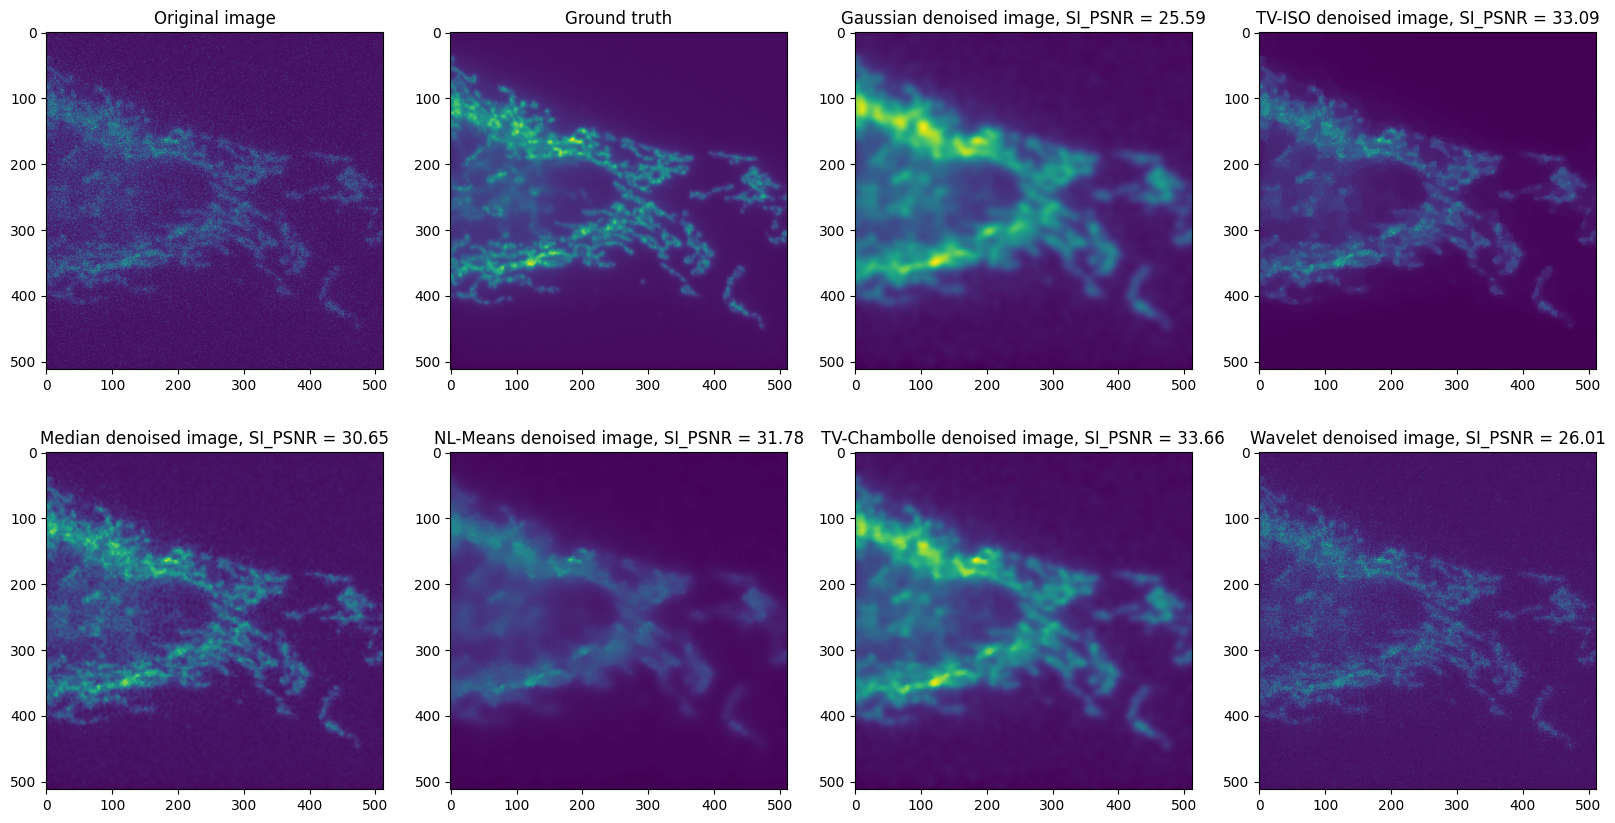

In [ ]:
# plot the denoised images
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0,0].imshow(slice)
ax[0,0].set_title('Original image')
ax[0,1].imshow(ground_truth_image)
ax[0,1].set_title('Ground truth')
ax[0,2].imshow(denoised_image_gaussian)
ax[0,2].set_title('Gaussian denoised image, SI_PSNR = {:.2f}'.format(psnr_gaussian[1]))
ax[0,3].imshow(denoised_TV_ISO_008_image)
ax[0,3].set_title('TV-ISO denoised image, SI_PSNR = {:.2f}'.format(best_psnr_tv_iso))
ax[1,0].imshow(denoised_image_median_param5)
ax[1,0].set_title('Median denoised image, SI_PSNR = {:.2f}'.format(best_psnr_median))
ax[1,1].imshow(denoised_image_NL_Means)
ax[1,1].set_title('NL-Means denoised image, SI_PSNR = {:.2f}'.format(psnr_nl_means[1]))
ax[1,2].imshow(denoised_image_TV_Chambolle_param03)
ax[1,2].set_title('TV-Chambolle denoised image, SI_PSNR = {:.2f}'.format(best_psnr_tv_chambolle))
ax[1,3].imshow(denoised_image_TV_Wavelet)
ax[1,3].set_title('Wavelet denoised image, SI_PSNR = {:.2f}'.format(psnr_wavelet[1]))



plt.show()